### Example on Necessary and Sufficiency for Containment 

We investigate zonotope in V-polytope containment. First, we import `numpy` and `pypolycontain`.

In [1]:
import pypolycontain as pp
import numpy as np
np.random.seed(10)

Import mathematical program with Gurobi solver from pydrake. 
_**Warning:** Here I assume you have Gurobi solver installed with Drake's python bindings. Otherwise, replace Gurobi with SCS solver below.

In [2]:
import pydrake.solvers.mathematicalprogram as MP
import pydrake.solvers.gurobi as Gurobi_drake
# use Gurobi solver
global gurobi_solver, license
gurobi_solver=Gurobi_drake.GurobiSolver()
license = gurobi_solver.AcquireLicense()

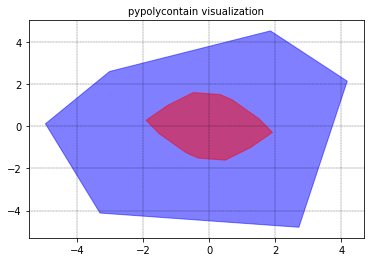

In [3]:
V_circimbody=pp.objects.V_polytope([10*np.random.random((2,1))-5 for i in range(16)])
circumbody=pp.conversions.to_AH_polytope(V_circimbody)
circumbody.color='blue'
Z_inbody=pp.objects.zonotope(x=np.zeros((2,1)),G=np.random.random((2,6))-0.5,color='red')
pp.visualize.visualize([circumbody,Z_inbody])

### Optimization
Now we solve the following optimization problem

In [5]:
s_n,N={},15
for i in range(N):
    prog=MP.MathematicalProgram()
    s=prog.NewContinuousVariables(1,"s")
    Z_s=pp.objects.zonotope(Z_inbody.x,Z_inbody.G*s)
    prog.AddLinearCost(-np.array([1]),np.array([0]),s)
    pp.containment.subset(prog,Z_s,circumbody,N=i-1)
    result=gurobi_solver.Solve(prog,None,None)
    if result.is_success():
        print("subset test successfull")
        s_n[i]=result.GetSolution(s)
        print(i-1,"s=",s_n[i])
    else:
        print("not a subset") 

Theta Dimensions were (16, 16)
subset test successfull
-1 s= [1.68371574]
Theta Dimensions were (16, 6)
subset test successfull
0 s= [1.88710961]
Theta Dimensions were (16, 14)
subset test successfull
1 s= [1.88710961]
Theta Dimensions were (16, 24)
subset test successfull
2 s= [1.88710961]
Theta Dimensions were (16, 38)
subset test successfull
3 s= [1.85979131]
Theta Dimensions were (16, 44)
subset test successfull
4 s= [1.82711866]
Theta Dimensions were (16, 58)
subset test successfull
5 s= [1.80954004]
Theta Dimensions were (16, 57)
subset test successfull
6 s= [1.80928106]
Theta Dimensions were (16, 66)
subset test successfull
7 s= [1.68371574]
Theta Dimensions were (16, 81)
subset test successfull
8 s= [1.68371574]
Theta Dimensions were (16, 82)
subset test successfull
9 s= [1.68371574]
Theta Dimensions were (16, 84)
subset test successfull
10 s= [1.68371574]
Theta Dimensions were (16, 100)
subset test successfull
11 s= [1.68371574]
Theta Dimensions were (16, 55)
subset test succe

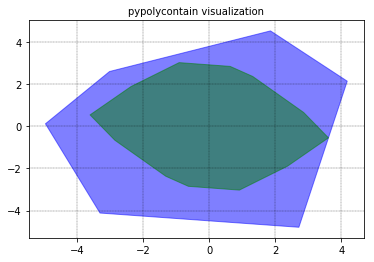

In [7]:
pp.visualize.visualize([circumbody,pp.objects.zonotope(Z_inbody.x,Z_inbody.G*(s_n[1]))])

Text(0.5,1,'Less is more conservative')

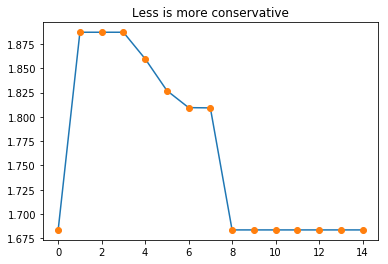

In [8]:
import matplotlib.pyplot as plt
plt.plot(range(N),[s_n[i] for i in range(N)])
plt.plot(range(N),[s_n[i] for i in range(N)],'o')
plt.title("Less is more conservative")